In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 32s 7us/step


In [3]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
#showing image

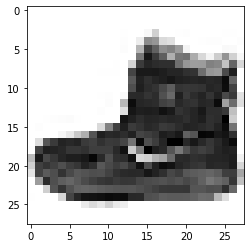

In [10]:
plt.imshow(X_train[0],cmap='Greys')

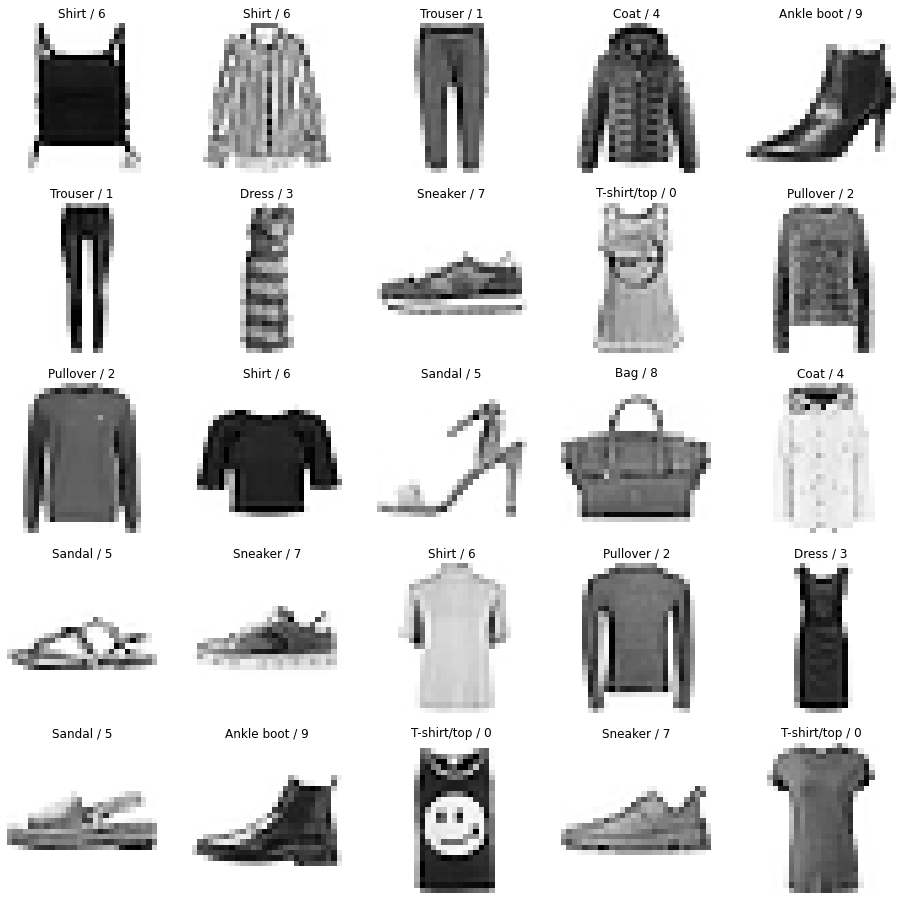

In [11]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train = np.expand_dims(X_train,-1)

In [13]:
X_train.ndim

4

In [14]:
X_test=np.expand_dims(X_test,-1)


In [15]:
X_train = X_train/255
X_test= X_test/255

In [16]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [17]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [18]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 25s 257ms/step - loss: 0.6227 - accuracy: 0.7862 - val_loss: 0.4297 - val_accuracy: 0.8537
Epoch 2/10
94/94 [==============================] - 24s 253ms/step - loss: 0.3909 - accuracy: 0.8645 - val_loss: 0.3819 - val_accuracy: 0.8660
Epoch 3/10
94/94 [==============================] - 24s 253ms/step - loss: 0.3424 - accuracy: 0.8802 - val_loss: 0.3493 - val_accuracy: 0.8790
Epoch 4/10
94/94 [==============================] - 24s 259ms/step - loss: 0.3142 - accuracy: 0.8908 - val_loss: 0.3219 - val_accuracy: 0.8874
Epoch 5/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2905 - accuracy: 0.8976 - val_loss: 0.3270 - val_accuracy: 0.8863
Epoch 6/10
94/94 [==============================] - 24s 252ms/step - loss: 0.2755 - accuracy: 0.9031 - val_loss: 0.2947 - val_accuracy: 0.8976
Epoch 7/10
94/94 [==============================] - 23s 245ms/step - loss: 0.2575 - accuracy: 0.9100 - val_loss: 0.3013 - val_accuracy: 0.8936

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2881 - accuracy: 0.8928


[0.2880542576313019, 0.892799973487854]

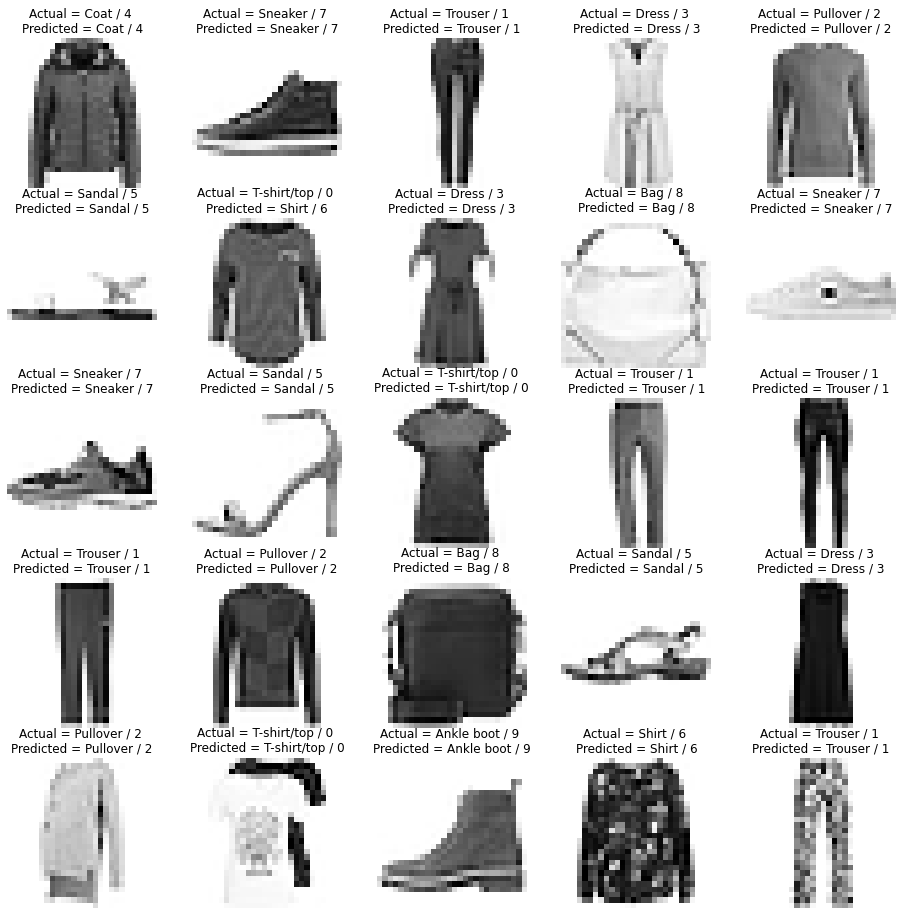

In [25]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

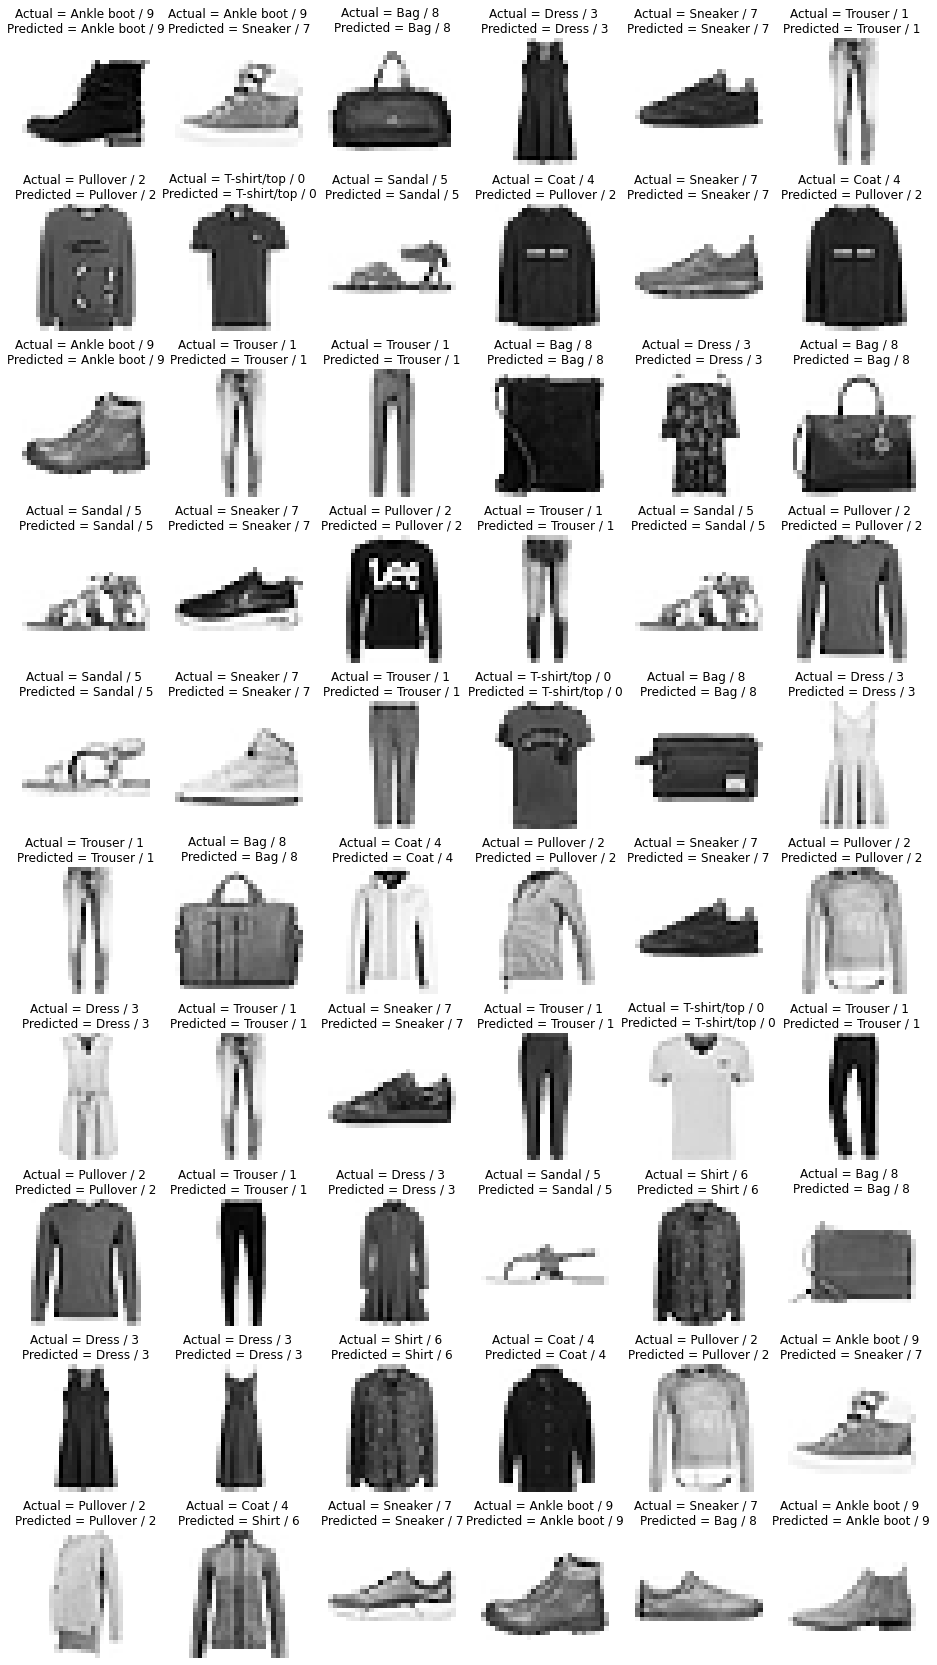

In [26]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 100,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.86      0.84      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.91      0.73      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.69      0.73      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



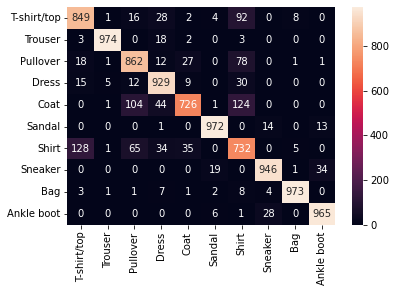

In [28]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [29]:

model.save('fashion_mnist_cnn_model.h5')

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 29s 303ms/step - loss: 1.0094 - accuracy: 0.6326 - val_loss: 0.5711 - val_accuracy: 0.7793
Epoch 2/20
94/94 [==============================] - 28s 303ms/step - loss: 0.5523 - accuracy: 0.7936 - val_loss: 0.4584 - val_accuracy: 0.8289
Epoch 3/20
94/94 [==============================] - 29s 308ms/step - loss: 0.4594 - accuracy: 0.8318 - val_loss: 0.4202 - val_accuracy: 0.8418
Epoch 4/20
94/94 [==============================] - 29s 309ms/step - loss: 0.4059 - accuracy: 0.8503 - val_loss: 0.3815 - val_accuracy: 0.8614
Epoch 5/20
94/94 [==============================] - 28s 296ms/step - loss: 0.3666 - accuracy: 0.8653 - val_loss: 0.3489 - val_accuracy: 0.8705
Epoch 6/20
94/94 [==============================] - 28s 294ms/step - loss: 0.3409 - accuracy: 0.8737 - val_loss: 0.3354 - val_accuracy: 0.8758
Epoch 7/20
94/94 [==============================] - 28s 293ms/step - loss: 0.3223 - accuracy: 0.8823 - val_loss: 0.3175 - val_accuracy: 0.8843

94/94 [==============================] - 71s 755ms/step - loss: 0.0759 - accuracy: 0.9735 - val_loss: 0.4211 - val_accuracy: 0.8999
Epoch 39/50
94/94 [==============================] - 70s 750ms/step - loss: 0.0766 - accuracy: 0.9735 - val_loss: 0.4031 - val_accuracy: 0.9065
Epoch 40/50
94/94 [==============================] - 72s 765ms/step - loss: 0.0713 - accuracy: 0.9751 - val_loss: 0.4277 - val_accuracy: 0.9024
Epoch 41/50
94/94 [==============================] - 71s 754ms/step - loss: 0.0669 - accuracy: 0.9769 - val_loss: 0.4384 - val_accuracy: 0.9064
Epoch 42/50
94/94 [==============================] - 72s 762ms/step - loss: 0.0634 - accuracy: 0.9782 - val_loss: 0.4264 - val_accuracy: 0.9074
Epoch 43/50
94/94 [==============================] - 70s 744ms/step - loss: 0.0663 - accuracy: 0.9772 - val_loss: 0.4439 - val_accuracy: 0.9031
Epoch 44/50
94/94 [==============================] - 70s 745ms/step - loss: 0.0638 - accuracy: 0.9778 - val_loss: 0.4352 - val_accuracy: 0.9059
Epoc

In [ ]:
y_pred = cnn_model3.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)